In [ ]:
# Name: Yihsuan Sun
# Email: yihsuan.sun88@gmail.com

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# In this EDA project, I will generate 5-7 hypothesis initially

In [3]:
# Note from Canvas

# Which company has maximum cab users at a particular time period?
# Yellow cab has higher profits most of the time. And in the process of calculation, 
# we can noticed that the yellow cab has a relatively large user group
#
# Both companies will have fewer users by the end of the year

# Does margin proportionally increase with increase in number of customers?
# Take yellow cab company as an example,their user base is relatively large, 
# and as a result, their profits are relatively high

# What are the attributes of these customer segments?
# Male, 20-40(age), large or populous cities

In [4]:
# hypothesis

# 1. Middle-aged and seniors may need more cab service
# From the dataframe and the chart, we will see that younger people are more likely to use cab services

# 2. Populous cities will have a more extensive customer base
# From the chart, we can notice that most of the user base occurs in cities with high population density

# 3. Allowing customers to pay in cash will be more profitable
# The results shows that Credit card payments are more prone to negative profits than cash payments, 
# which means that letting users pay in cash will be a better choice

# 4. Women are more likely to use this service than men
# More than half of the clients are Male

# 5. Is the profit increasing year by year?
# From 2016 to 2018, we can see that profits are decreasing year by year

In [5]:
# Read Cab_Data.csv as dataframe
CabData = pd.read_csv('Cab_Data.csv')

In [6]:
# Count number of rows -- CabData
num_rows1 = CabData.count()[0]
print(num_rows1)

359392


In [7]:
CabData.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [8]:
CabData.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [9]:
# List all the compary 
print(CabData['Company'].unique())

['Pink Cab' 'Yellow Cab']


In [10]:
# Print the number of rows(Count) in Pink cab company and Yellow cab company

C1 = 0 # Pink Cab
C2 = 0 # Yellow Cab
other = 0
for i in range(0, len(CabData['Company'])):
    
    if CabData['Company'][i] == 'Pink Cab':   
        C1 += 1
    elif CabData['Company'][i] == 'Yellow Cab':
        C2 += 1
    else:
        other += 1
  
print("Record number of rides (Pink Cab)", C1)
print("Record number of rides (Yellow Cab)", C2)
print("Record number of rides (other)", other)

Record number of rides (Pink Cab) 84711
Record number of rides (Yellow Cab) 274681
Record number of rides (other) 0


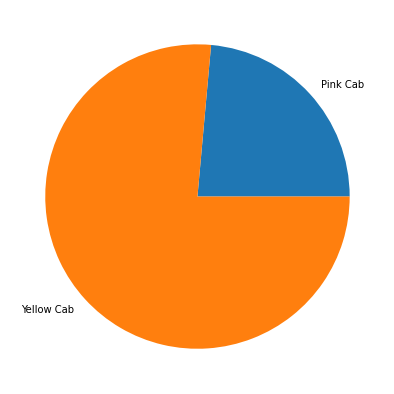

In [11]:
# Plot pie chart
Company = ['Pink Cab', 'Yellow Cab']
 
data = [C1, C2]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Company)

plt.show()

In [12]:
#Count num of each City

NIEC = CabData.groupby(['City'])['Transaction ID'].count()
Num_In_Each_City = NIEC.to_frame()

Num_In_Each_City

,Transaction ID
City,
ATLANTA GA,7557
AUSTIN TX,4896
BOSTON MA,29692
CHICAGO IL,56625
DALLAS TX,7017
DENVER CO,3825
LOS ANGELES CA,48033
MIAMI FL,6454
NASHVILLE TN,3010


<AxesSubplot:ylabel='Transaction ID'>

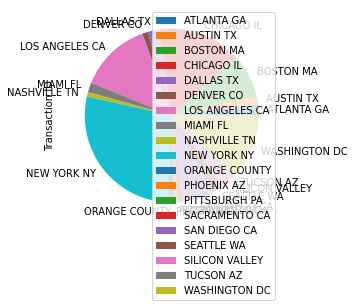

In [13]:
# First plot, next one is better
Num_In_Each_City.groupby(['City']).sum().plot(kind='pie', y='Transaction ID')

array([<AxesSubplot:ylabel='Transaction ID'>], dtype=object)

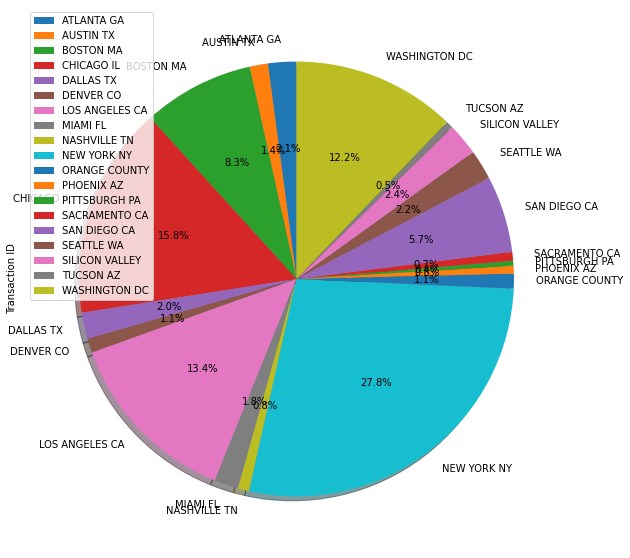

In [14]:
# Plot with percentage
Num_In_Each_City.groupby(['City']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')

In [15]:
City = pd.read_csv('City.csv') # Read City.csv as dataframe

In [16]:
# Count rows in City dataframe
num_rows2 = City.count()[0]
print(num_rows2)

20


In [17]:
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [18]:
# List all the city in City.csv
print(City['City'].unique())

['NEW YORK NY' 'CHICAGO IL' 'LOS ANGELES CA' 'MIAMI FL' 'SILICON VALLEY'
 'ORANGE COUNTY' 'SAN DIEGO CA' 'PHOENIX AZ' 'DALLAS TX' 'ATLANTA GA'
 'DENVER CO' 'AUSTIN TX' 'SEATTLE WA' 'TUCSON AZ' 'SAN FRANCISCO CA'
 'SACRAMENTO CA' 'PITTSBURGH PA' 'WASHINGTON DC' 'NASHVILLE TN'
 'BOSTON MA']


In [19]:
Customer_ID = pd.read_csv('Customer_ID.csv') # Read Customer_ID.csv as dataframe

In [20]:
# Count rows in Customer_ID
num_rows3 = Customer_ID.count()[0]
print(num_rows3)

49171


In [21]:
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [22]:
# sns.distplot(a=Customer_ID["Age"], hist=True)

(array([7903., 7907., 7806., 6161., 6795., 2641., 2149., 2584., 2608.,
        2617.]),
 array([18. , 22.7, 27.4, 32.1, 36.8, 41.5, 46.2, 50.9, 55.6, 60.3, 65. ]),
 <BarContainer object of 10 artists>)

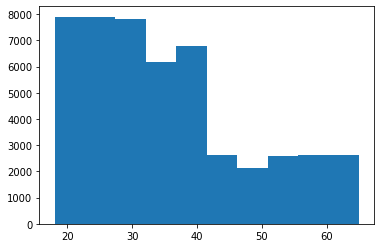

In [23]:
# Display in histogram, num of each age
plt.hist(Customer_ID["Age"]) 

In [24]:
# print the count in each age range
G1 = 0
G2 = 0
G3 = 0
G4 = 0
G5 = 0
G6 = 0

for i in range(0, len(Customer_ID["Age"])):
    
    if Customer_ID["Age"][i] <20:   
        G1 += 1
    elif Customer_ID["Age"][i] <30:
        G2 += 1
    elif Customer_ID["Age"][i] <40:
        G3 += 1
    elif Customer_ID["Age"][i] <50:
        G4 += 1
    elif Customer_ID["Age"][i] <70:
        G5 += 1
    else:
        G6 += 1
  
print("Number of customer whose younger than 20 years old", G1)
print("Number of customer between the ages of 20 and 30", G2)
print("Number of customer between the ages of 30 and 40", G3)
print("Number of customer between the ages of 40 and 50", G4)
print("Number of customer between the ages of 50 and 70", G5)
print("Number of customer whose older than 70 years old", G6)

Number of customer whose younger than 20 years old 3112
Number of customer between the ages of 20 and 30 15797
Number of customer between the ages of 30 and 40 15579
Number of customer between the ages of 40 and 50 6336
Number of customer between the ages of 50 and 70 8347
Number of customer whose older than 70 years old 0


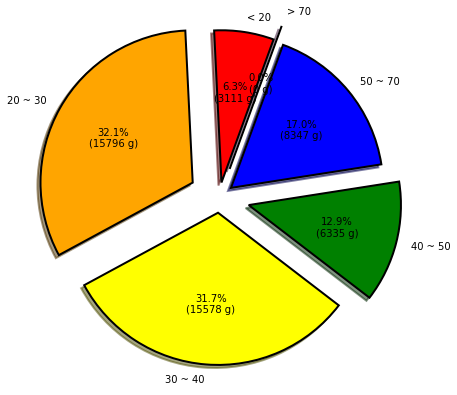

In [25]:
# Create a pie chart

AgeGroup = ['< 20', '20 ~ 30', '30 ~ 40','40 ~ 50', '50 ~ 70', '> 70']
 
data = [G1, G2, G3, G4, G5, G6]

colors = ( "red", "orange", "yellow", "green", "blue", "purple")

explode = (0.1, 0.2, 0.1, 0.2, 0.1, 0.2)

wp = { 'linewidth' : 2, 'edgecolor' : "black" }

# Creating autocpt arguments -- https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = AgeGroup,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 70,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

(array([1551., 1561., 1641., 1554., 1596., 1615., 1547., 1597., 1577.,
        1571., 1588., 1511., 1573., 1549., 1585., 1495.,    0., 1629.,
        1503., 1534., 1575., 1512., 1624., 1561.,  523.,  526.,  532.,
         492.,  551.,  540.,  539.,  533.,  539.,    0.,  538.,  525.,
         539.,  510.,  506.,  504.,  521.,  498.,  536.,  552.,  501.,
         580.,  497.,  512.,  536.,  492.]),
 array([18.  , 18.94, 19.88, 20.82, 21.76, 22.7 , 23.64, 24.58, 25.52,
        26.46, 27.4 , 28.34, 29.28, 30.22, 31.16, 32.1 , 33.04, 33.98,
        34.92, 35.86, 36.8 , 37.74, 38.68, 39.62, 40.56, 41.5 , 42.44,
        43.38, 44.32, 45.26, 46.2 , 47.14, 48.08, 49.02, 49.96, 50.9 ,
        51.84, 52.78, 53.72, 54.66, 55.6 , 56.54, 57.48, 58.42, 59.36,
        60.3 , 61.24, 62.18, 63.12, 64.06, 65.  ]),
 <BarContainer object of 50 artists>)

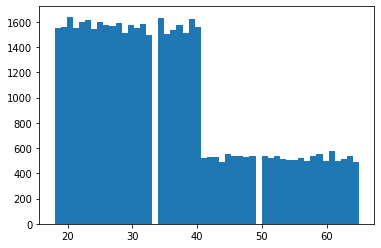

In [26]:
# Display in histogram - num in each age
plt.hist(Customer_ID["Age"], bins=50)

In [27]:
Transaction_ID = pd.read_csv('Transaction_ID.csv') # Read Transaction_ID.csv as dataframe

In [28]:
# print number of rows
num_rows4 = Transaction_ID.count()[0]
print(num_rows4)

440098


In [29]:
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [30]:
Transaction_ID.tail()

,Transaction ID,Customer ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card


In [31]:
# List all the payment method
print(Transaction_ID['Payment_Mode'].unique())

['Card' 'Cash']


In [32]:
# Merge three dataframe - CabData, Customer_ID, Transaction_ID

In [33]:
mergeTC = pd.merge(Transaction_ID, CabData, on ='Transaction ID')

In [34]:
num_rows5 = mergeTC.count()[0]
print(num_rows5)

359392


In [35]:
mergeTC.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [36]:
mergeTCC = pd.merge(mergeTC, Customer_ID, on ='Customer ID')

In [37]:
num_rows6 = mergeTCC.count()[0]
print(num_rows6)

359392


In [38]:
mergeTCC.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237


In [39]:
mergeTCC["profit"] = mergeTCC["Price Charged"] - mergeTCC["Cost of Trip"] # create profit column

In [40]:
mergeTCC.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),profit
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150
1,10351127,29290,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772
2,10412921,29290,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480
3,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660
4,10320494,27703,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808


In [41]:
# Fix the Date of Travel column
date_offsets = mergeTCC['Date of Travel'].tolist()
base_date = pd.Timestamp('1899-12-30')  # check this! 1901-01-01
dates = [
    base_date + pd.DateOffset(date_offset) 
    for date_offset in date_offsets
]

# print(dates[0:5])
mergeTCC['Date of Travel'] = pd.DataFrame(dates)

In [42]:
mergeTCC.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),profit
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808


In [43]:
# Select those rows --Pink cab, and create a new dataframe
df_Pink = mergeTCC[(mergeTCC['Company'] == 'Pink Cab')] # select compary = 'Pink cabe' and create a new dataframe

In [44]:
df_Pink.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),profit
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,57.315
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,23.666
6,10395626,27703,Card,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.934,Male,27,9237,25.096
7,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,27.568
11,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,25.798


In [45]:
# Select those rows --Yellow cab,and create a new dataframe
df_Yellow = mergeTCC[(mergeTCC['Company'] == 'Yellow Cab')] # select compary = 'Yellow cabe' and create a new dataframe

In [46]:
df_Yellow.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),profit
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808
5,10324737,27703,Cash,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,Male,27,9237,50.8912
8,10079404,28712,Card,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,Male,53,11242,210.0920


<AxesSubplot:xlabel='profit', ylabel='Price Charged'>

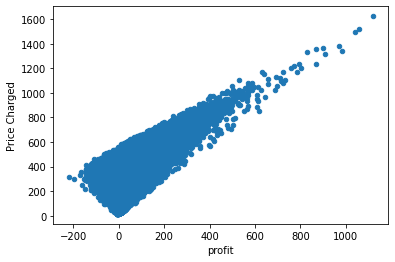

In [47]:
df_Pink.plot.scatter(x='profit', y='Price Charged', colormap='viridis') # scatter plot
# We can noticed that some rows have negative profit -- Pink cab

In [48]:
(df_Pink['profit'] < 0).sum() 
# Count the number of rows with negative profit

11129

In [49]:
df1 = df_Pink[(df_Pink['profit'] < 0)] # new dataframe include those negative profit rows -- Pink cab

In [50]:
df1.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),profit
55,10033870,58774,Card,2016-05-18,Pink Cab,BOSTON MA,38.76,358.90,437.988,Male,20,23602,-79.088
149,10186345,58346,Card,2017-06-22,Pink Cab,BOSTON MA,35.70,333.12,360.570,Male,27,21650,-27.450
390,10347790,5777,Card,2018-07-14,Pink Cab,CHICAGO IL,15.47,173.51,176.358,Male,24,28850,-2.848
402,10066945,3571,Card,2016-08-29,Pink Cab,CHICAGO IL,10.45,100.83,108.680,Male,44,15166,-7.850
445,10179123,5734,Card,2017-06-02,Pink Cab,CHICAGO IL,38.28,385.22,444.048,Male,23,22475,-58.828


In [51]:
df2 = df_Yellow[(df_Yellow['profit'] < 0)] # new dataframe include those negative profit rows -- Yellow cab

In [52]:
df2.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),profit
26,10246065,33788,Cash,2017-10-29,Yellow Cab,AUSTIN TX,35.97,492.70,500.7024,Male,23,23788,-8.0024
65,10020665,58627,Card,2016-03-31,Yellow Cab,BOSTON MA,31.64,407.07,432.8352,Male,28,27338,-25.7652
78,10362532,58627,Card,2018-08-16,Yellow Cab,BOSTON MA,13.09,162.15,168.0756,Male,28,27338,-5.9256
83,10065021,59007,Card,2016-08-23,Yellow Cab,BOSTON MA,14.70,194.14,204.6240,Male,63,6683,-10.4840
86,10121293,59007,Cash,2016-12-15,Yellow Cab,BOSTON MA,12.76,164.52,165.3696,Male,63,6683,-0.8496


In [53]:
TotalProfit_Pink = df_Pink['profit'].sum()  # Count the total profit - Pink cab

In [54]:
TotalProfit_Pink

5307328.3209999995

<AxesSubplot:xlabel='profit', ylabel='Price Charged'>

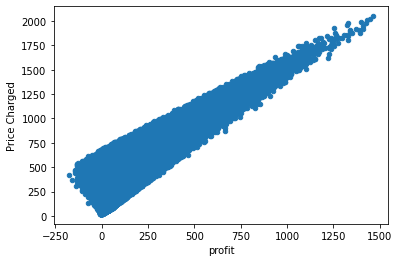

In [55]:
df_Yellow.plot.scatter(x='profit', y='Price Charged', colormap='viridis') # scatter plot
# We can noticed that some rows have negative profit -- Yellow cab

In [56]:
(df_Yellow['profit'] < 0).sum() # Count the number of rows with negative profit--Yellow cab

13690

In [57]:
TotalProfit_Yellow = df_Yellow['profit'].sum()
TotalProfit_Yellow
# Count the total profit - Yellow cab

44020373.17079999

<AxesSubplot:xlabel='Price Charged', ylabel='profit'>

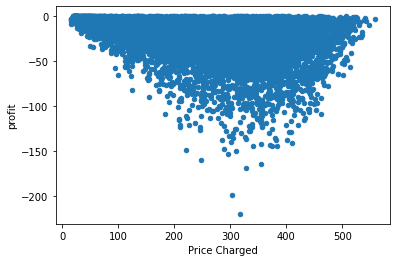

In [58]:
df1.plot.scatter(x='Price Charged', y='profit') # to find the price that might get negative profit most - Pink

<AxesSubplot:xlabel='Price Charged', ylabel='profit'>

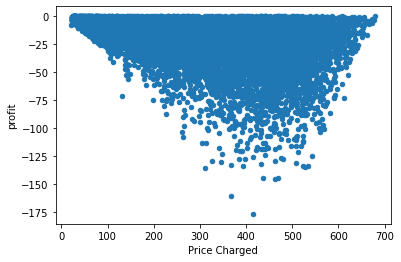

In [59]:
df2.plot.scatter(x='Price Charged', y='profit')# to find the price that might get negative profit most - Yellow

<AxesSubplot:xlabel='Payment_Mode', ylabel='profit'>

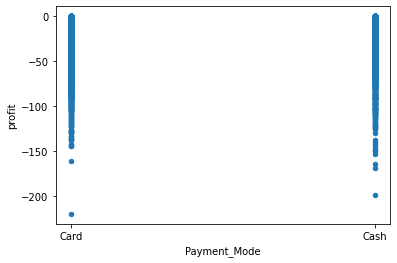

In [60]:
df1.plot.scatter(x='Payment_Mode', y='profit') # want to see the count different between two payment method, but the 
# visualization worked bad, see next part

In [61]:
df1.count() # Count total number with negative profit dataframe

Transaction ID        11129
Customer ID           11129
Payment_Mode          11129
Date of Travel        11129
Company               11129
City                  11129
KM Travelled          11129
Price Charged         11129
Cost of Trip          11129
Gender                11129
Age                   11129
Income (USD/Month)    11129
profit                11129
dtype: int64

In [62]:
(df1['Payment_Mode'] == 'Cash').sum() # Check the total num of times get negative profit use Cash -- Pink

4448

In [63]:
(df1['Payment_Mode'] == 'Card').sum() # Check the total num of times get negative profit use Card -- Pink

6681

In [64]:
# Check the total number if it is correct -- Pink
4448+6681

11129

In [65]:
df2.count()

Transaction ID        13690
Customer ID           13690
Payment_Mode          13690
Date of Travel        13690
Company               13690
City                  13690
KM Travelled          13690
Price Charged         13690
Cost of Trip          13690
Gender                13690
Age                   13690
Income (USD/Month)    13690
profit                13690
dtype: int64

In [66]:
(df2['Payment_Mode'] == 'Cash').sum() # Check the total num of times get negative profit use Cash -- Yellow

5425

In [67]:
(df2['Payment_Mode'] == 'Card').sum() # Check the total num of times get negative profit use Cash -- Pink

8265

In [68]:
# Check the total number if it is correct -- Yellow
5425+8265

13690

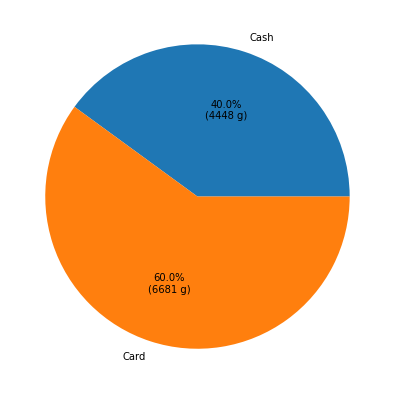

In [69]:
# Display (Pink cab), percentage of getting negative profit from Cash or card
Pay_method_Pink = ['Cash', 'Card']
 
data = [4448, 6681] # num from above

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Pay_method_Pink, autopct = lambda pct: func(pct, data))

plt.show()

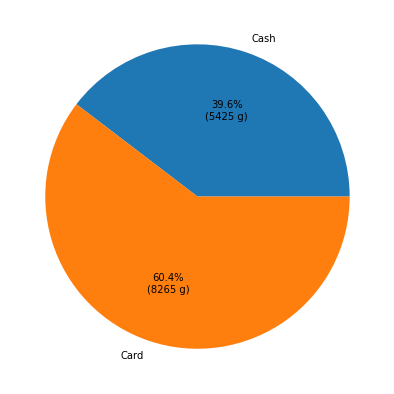

In [70]:
# Display (Yellow cab), percentage of getting negative profit from Cash or card
Pay_method_Yellow = ['Cash', 'Card']
 
data = [5425, 8265] # num from above

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Pay_method_Yellow, autopct = lambda pct: func(pct, data))

plt.show()

<AxesSubplot:xlabel='Date of Travel', ylabel='profit'>

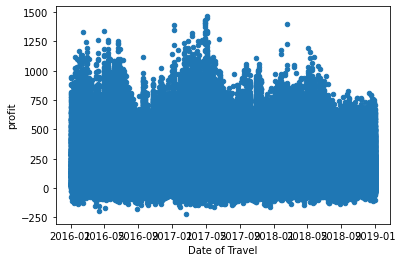

In [71]:
# Use scatter plot to see particular time period
mergeTCC.plot.scatter(x='Date of Travel', y='profit')
# From the result we can see that lower profits at the end of the year
# We can also find that profits are decreasing year by year

<AxesSubplot:xlabel='Date of Travel', ylabel='profit'>

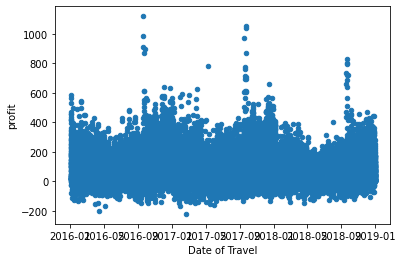

In [72]:
# Use scatter plot to see particular time period -- Pink cab
df_Pink.plot.scatter(x='Date of Travel', y='profit')

<AxesSubplot:xlabel='Date of Travel', ylabel='profit'>

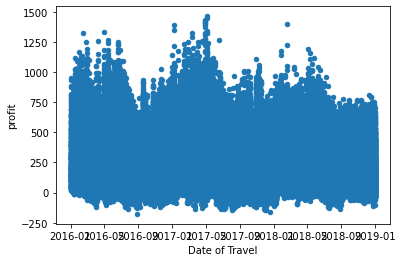

In [73]:
# Use scatter plot to see particular time period -- Yellow cab
df_Yellow.plot.scatter(x='Date of Travel', y='profit')

In [74]:
mergeTCC.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),profit
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808


In [75]:
# Print num of each gender in mergeTCC dataframe
Gender_M = 0
Gender_F = 0
Other_Gender = 0

for i in range(0, len(mergeTCC["Gender"])):
    
    if mergeTCC["Gender"][i] == 'Male':   
        Gender_M += 1
    elif mergeTCC["Gender"][i] == 'Female':
        Gender_F += 1
    else:
        Other_Gender += 1
  
print("Number of Male", Gender_M)
print("Number of Female", Gender_F)
print("Number of other gender", Other_Gender)

# Set Gender_M = num of Male and Gender_F = num of Frmale and Other_Gender = num of error

Number of Male 205912
Number of Female 153480
Number of other gender 0


In [76]:
(mergeTCC["Gender"] == 'Male').sum()

205912

In [77]:
(mergeTCC["Gender"] == 'Female').sum()

153480

In [78]:
mergeTCC.count()

Transaction ID        359392
Customer ID           359392
Payment_Mode          359392
Date of Travel        359392
Company               359392
City                  359392
KM Travelled          359392
Price Charged         359392
Cost of Trip          359392
Gender                359392
Age                   359392
Income (USD/Month)    359392
profit                359392
dtype: int64

In [79]:
205912 + 153480 # Check the total number is correct

359392

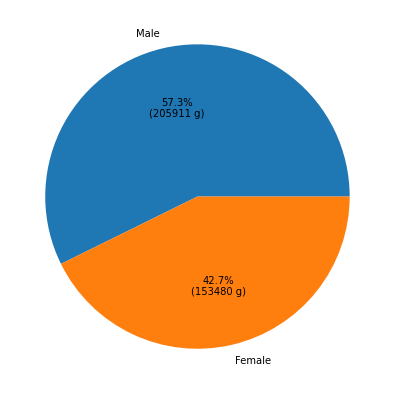

In [80]:
# Use the pie plot to display the percentage of each gender
Gender_type = ['Male', 'Female']
 
data = [Gender_M, Gender_F] # from above

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Gender_type, autopct = lambda pct: func(pct, data))

plt.show()

In [81]:
# Create a new column Year
mergeTCC['Year'] = mergeTCC['Date of Travel'].dt.year

In [82]:
mergeTCC.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),profit,Year
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150,2016
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,2018
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,2018
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660,2016
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,2018


In [83]:
# mergeTCC.plot.scatter(x='Year', y='profit', c='Year', colormap='viridis')
# Not a good visualization, see next part

In [84]:
# New dataframe, year2016
df2016 = mergeTCC[(mergeTCC['Year'] == 2016)]

In [85]:
df2016.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),profit,Year
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,57.315,2016
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,23.666,2016
7,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,27.568,2016
8,10079404,28712,Card,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.208,Male,53,11242,210.092,2016
11,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,25.798,2016


In [86]:
# New dataframe, year2017
df2017 = mergeTCC[(mergeTCC['Year'] == 2017)]

In [87]:
df2017.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),profit,Year
9,10186994,28712,Card,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,Male,53,11242,118.9736,2017
13,10140112,28020,Card,2017-01-27,Yellow Cab,ATLANTA GA,24.72,515.66,323.3376,Male,23,23327,192.3224,2017
17,10179732,27182,Cash,2017-06-03,Yellow Cab,ATLANTA GA,20.00,321.04,271.2000,Male,33,8536,49.8400,2017
22,10196539,27318,Card,2017-07-19,Pink Cab,ATLANTA GA,26.73,329.46,299.3760,Male,25,13984,30.0840,2017
23,10197294,27318,Card,2017-07-16,Yellow Cab,ATLANTA GA,15.00,410.62,205.2000,Male,25,13984,205.4200,2017


In [88]:
# New dataframe, year2018
df2018 = mergeTCC[(mergeTCC['Year'] == 2018)]

In [89]:
df2018.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),profit,Year
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,2018
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,2018
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,2018
5,10324737,27703,Cash,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,Male,27,9237,50.8912,2018
6,10395626,27703,Card,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,Male,27,9237,25.0960,2018


In [90]:
Count1 = df2016.count()
Count1

Transaction ID        107319
Customer ID           107319
Payment_Mode          107319
Date of Travel        107319
Company               107319
City                  107319
KM Travelled          107319
Price Charged         107319
Cost of Trip          107319
Gender                107319
Age                   107319
Income (USD/Month)    107319
profit                107319
Year                  107319
dtype: int64

In [91]:
Count2 = df2017.count()
Count2

Transaction ID        128510
Customer ID           128510
Payment_Mode          128510
Date of Travel        128510
Company               128510
City                  128510
KM Travelled          128510
Price Charged         128510
Cost of Trip          128510
Gender                128510
Age                   128510
Income (USD/Month)    128510
profit                128510
Year                  128510
dtype: int64

In [92]:
Count3 = df2018.count()
Count3

Transaction ID        123563
Customer ID           123563
Payment_Mode          123563
Date of Travel        123563
Company               123563
City                  123563
KM Travelled          123563
Price Charged         123563
Cost of Trip          123563
Gender                123563
Age                   123563
Income (USD/Month)    123563
profit                123563
Year                  123563
dtype: int64

In [93]:
# Find averge profit in 2016
av_2016 = df2016['profit'].mean(axis=0)
av_2016

145.7384680774141

In [94]:
# Find averge profit in 2017
av_2017 = df2017['profit'].mean(axis=0)
av_2017

144.8107764065053

In [95]:
# Find averge profit in 2018
av_2018 = df2018['profit'].mean(axis=0)
av_2018

122.02327525391907

In [96]:
# Create a new dataframe include average profit from 2016 to 2018
P_Year = [2016, 2017, 2018]
P_each_year = [av_2016, av_2017, av_2018]

data = []
data.append(P_Year)
data.append(P_each_year)

data

[[2016, 2017, 2018],
 [145.7384680774141, 144.8107764065053, 122.02327525391907]]

In [97]:
newdfYP = pd.DataFrame(data).transpose()
newdfYP.columns=['Year', 'Average Profit']

In [98]:
newdfYP

,Year,Average Profit
0,2016.0,145.738468
1,2017.0,144.810776
2,2018.0,122.023275
